<a href="https://colab.research.google.com/github/AriesAnon/i-SenseCNN/blob/main/Multiclass_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Test Regarding Multi-Class Transfer Learning Using The Inception V3**

# **Status: Success 😁**

References:

[YouTube]('https://www.youtube.com/watch?v=LsdxvjLWkIY&ab_channel=codebasics')

[GitHub]('https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/18_transfer_learning/cnn_transfer_learning.ipynb')

*This cell is copied from the very last cell for convenience's sake*

# **Conclusion: Transfer Learning Success**

***For a more higher accuracy, consider adding more data into the dataset as well as increasing the number of epochs. For now, it successfully predicted a foreign image (image not in the dataset). This will also increase the training time especially if all of the common meat cuts where included. Consider doing this ASAP.***

For reference, here are the list of the labels initialized previously for the model:

```
meat_labels_dict = {
    'beef_short_ribs': 0,
    'beef_sirloin_unfinished': 1,
    'chicken_breast': 2,
    'chicken_feet': 3,
    'chicken_leg': 4,
    'pork_ribs': 5,
}
```

Therefore, since the image is chicken breast and the result is array[2], the prediction is correct.

To do: 
*   Export the model and try to run it using the Raspberry Pi. Buy meat cuts that are present in the dataset and try to compare the result.
*   Create a class that will automatically normalise images into the appropriate size and shape. 

In [55]:
import numpy as np
import cv2

import PIL.Image as Image
import os
from os import getcwd
#import pathlib

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/classification/4", output_shape=[1001])
])
classifier.build([None, 299, 299, 3])  # Batch input shape.

In [5]:
!pwd

/content


In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


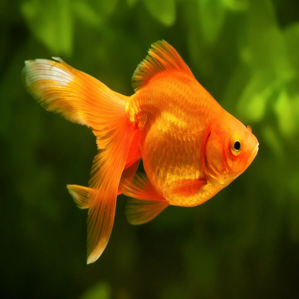

In [10]:
IMAGE_SHAPE = (299,299)
goldfish_image_test = Image.open('/content/drive/MyDrive/CNNRelatedFolders/Test Images/goldfish.jpg').resize(IMAGE_SHAPE)
goldfish_image_test

In [11]:
goldfish_image_test = np.array(goldfish_image_test)/255.0
goldfish_image_test.shape

(299, 299, 3)

In [12]:
goldfish_image_test

array([[[0.14509804, 0.21960784, 0.        ],
        [0.14509804, 0.21960784, 0.        ],
        [0.14509804, 0.21960784, 0.        ],
        ...,
        [0.09411765, 0.1372549 , 0.00784314],
        [0.09019608, 0.13333333, 0.00784314],
        [0.09019608, 0.13333333, 0.00784314]],

       [[0.14117647, 0.21568627, 0.        ],
        [0.14117647, 0.21568627, 0.        ],
        [0.14117647, 0.21568627, 0.        ],
        ...,
        [0.09411765, 0.1372549 , 0.00392157],
        [0.09019608, 0.13333333, 0.00784314],
        [0.09019608, 0.13333333, 0.00784314]],

       [[0.14117647, 0.21568627, 0.        ],
        [0.14117647, 0.21568627, 0.        ],
        [0.14117647, 0.21176471, 0.        ],
        ...,
        [0.09803922, 0.14117647, 0.00392157],
        [0.09019608, 0.13333333, 0.00392157],
        [0.09019608, 0.13333333, 0.00784314]],

       ...,

       [[0.01960784, 0.04313725, 0.00392157],
        [0.01960784, 0.04313725, 0.00392157],
        [0.01960784, 0

In [14]:
goldfish_image_test[np.newaxis, ...].shape

(1, 299, 299, 3)

In [45]:
result = classifier.predict(goldfish_image_test[np.newaxis, ...])
result.shape

(1, 1001)

In [46]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [25]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("/content/drive/MyDrive/CNNRelatedFolders/Test Images/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [47]:
image_labels[predicted_label_index]

'goldfish'

# **Trying out another picture and predict if it is correct**
Correct index of axolotl: 30

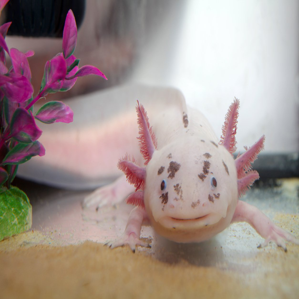

In [18]:
axolotl_image_test = Image.open('/content/drive/MyDrive/CNNRelatedFolders/Test Images/axolotl.jpg').resize(IMAGE_SHAPE)
axolotl_image_test

In [19]:
axolotl_image_test = np.array(axolotl_image_test)/255.0
axolotl_image_test.shape

(299, 299, 3)

In [22]:
axolotl_image_test[np.newaxis, ...].shape

(1, 299, 299, 3)

In [23]:
result = classifier.predict(axolotl_image_test[np.newaxis, ...])
result.shape

(1, 1001)

In [40]:
predicted_label_index = np.argmax(result)
predicted_label_index

30

In [42]:
image_labels[predicted_label_index]

'axolotl'

# **Importing the Dataset**

In [100]:
#Getting the dataset from the drive
path_dataset = f"{getcwd()}/../content/drive/MyDrive/CNNRelatedFolders/Datasets/UnfinishedDatasetCleaned.zip"

In [103]:
#UnZipping the File
from zipfile import ZipFile
file_name = path_dataset

with ZipFile(file_name,'r') as zip:
  zip.extractall('../content/')  # added a path to extract all of the files in the dataset zip
  print('Done')


Done


In [121]:
import pathlib
data_dir = pathlib.Path('/content/UnfinishedDataset')
data_dir


PosixPath('/content/UnfinishedDataset')

In [122]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/UnfinishedDataset/beef_sirloin_unfinished/102.jpg'),
 PosixPath('/content/UnfinishedDataset/beef_sirloin_unfinished/135.jpg'),
 PosixPath('/content/UnfinishedDataset/beef_sirloin_unfinished/23.jpg'),
 PosixPath('/content/UnfinishedDataset/beef_sirloin_unfinished/16.jpg'),
 PosixPath('/content/UnfinishedDataset/beef_sirloin_unfinished/22.jpg')]

In [123]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1197


In [124]:
beef_short_ribs = list(data_dir.glob('beef_short_ribs/*'))
beef_short_ribs[:5]

[PosixPath('/content/UnfinishedDataset/beef_short_ribs/304.jpg'),
 PosixPath('/content/UnfinishedDataset/beef_short_ribs/26.jpg'),
 PosixPath('/content/UnfinishedDataset/beef_short_ribs/272.jpg'),
 PosixPath('/content/UnfinishedDataset/beef_short_ribs/215.jpg'),
 PosixPath('/content/UnfinishedDataset/beef_short_ribs/135.jpg')]

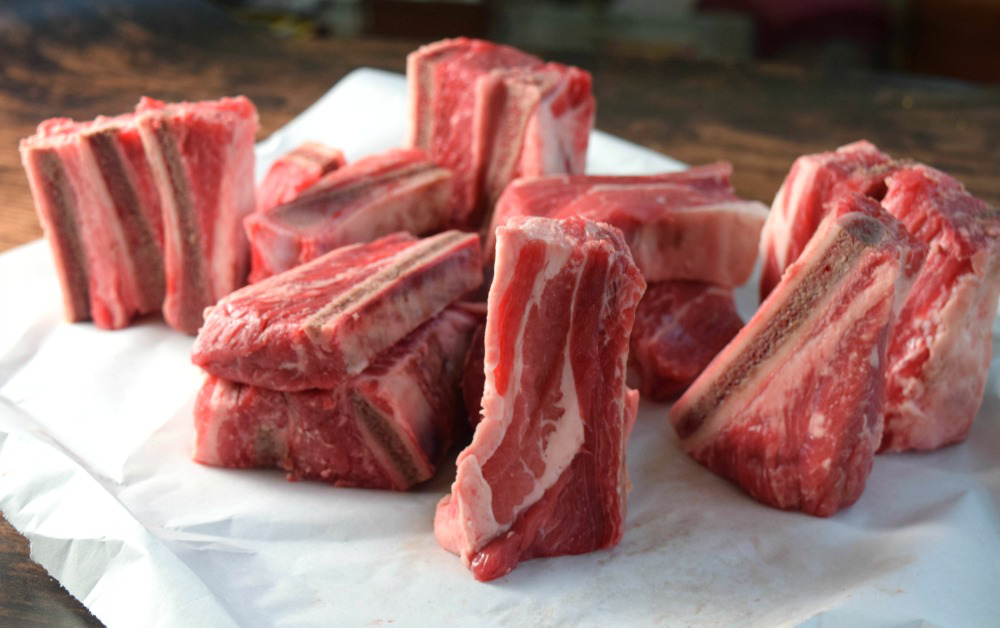

In [125]:
Image.open(str(beef_short_ribs[1]))

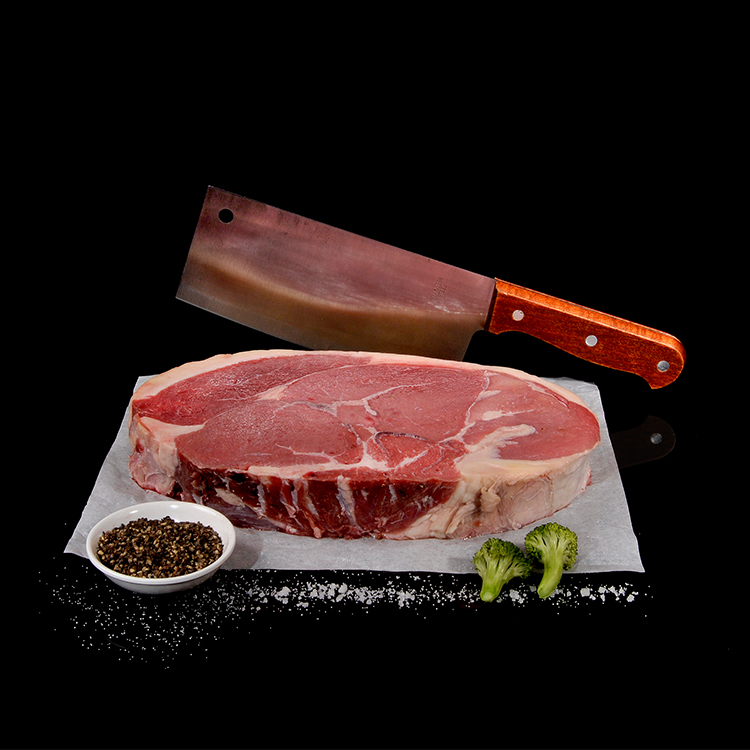

In [126]:
beef_sirloin_unfinished = list(data_dir.glob('beef_sirloin_unfinished/*'))
Image.open(str(beef_sirloin_unfinished[0]))

In [127]:
meat_images_dict = {
    'beef_short_ribs': list(data_dir.glob('beef_short_ribs/*')),
    'beef_sirloin_unfinished': list(data_dir.glob('beef_sirloin_unfinished/*')),
    'chicken_breast': list(data_dir.glob('chicken_breast/*')),
    'chicken_feet': list(data_dir.glob('chicken_feet/*')),
    'chicken_leg': list(data_dir.glob('chicken_leg/*')),
    'pork_ribs': list(data_dir.glob('pork_ribs/*')),
}

In [128]:
meat_labels_dict = {
    'beef_short_ribs': 0,
    'beef_sirloin_unfinished': 1,
    'chicken_breast': 2,
    'chicken_feet': 3,
    'chicken_leg': 4,
    'pork_ribs': 5,
}

In [129]:
meat_images_dict['beef_short_ribs'][:5]

[PosixPath('/content/UnfinishedDataset/beef_short_ribs/304.jpg'),
 PosixPath('/content/UnfinishedDataset/beef_short_ribs/26.jpg'),
 PosixPath('/content/UnfinishedDataset/beef_short_ribs/272.jpg'),
 PosixPath('/content/UnfinishedDataset/beef_short_ribs/215.jpg'),
 PosixPath('/content/UnfinishedDataset/beef_short_ribs/135.jpg')]

In [130]:
str(meat_images_dict['beef_short_ribs'][0])

'/content/UnfinishedDataset/beef_short_ribs/304.jpg'

In [131]:
img = cv2.imread(str(meat_images_dict['beef_short_ribs'][0]))

In [132]:
img.shape

(768, 1024, 3)

In [133]:
cv2.resize(img,(IMAGE_SHAPE)).shape

(299, 299, 3)

In [134]:
X, y = [], []

for meat_name, images in meat_images_dict.items():
    for image in images:
        print(image) #for checking for broken images; NOTE: delete broken images in the dataset
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(meat_labels_dict[meat_name])

/content/UnfinishedDataset/beef_short_ribs/304.jpg
/content/UnfinishedDataset/beef_short_ribs/26.jpg
/content/UnfinishedDataset/beef_short_ribs/272.jpg
/content/UnfinishedDataset/beef_short_ribs/215.jpg
/content/UnfinishedDataset/beef_short_ribs/135.jpg
/content/UnfinishedDataset/beef_short_ribs/317.jpg
/content/UnfinishedDataset/beef_short_ribs/23.jpg
/content/UnfinishedDataset/beef_short_ribs/256.jpg
/content/UnfinishedDataset/beef_short_ribs/16.jpg
/content/UnfinishedDataset/beef_short_ribs/22.jpg
/content/UnfinishedDataset/beef_short_ribs/237.jpg
/content/UnfinishedDataset/beef_short_ribs/66.jpg
/content/UnfinishedDataset/beef_short_ribs/206.jpg
/content/UnfinishedDataset/beef_short_ribs/192.jpg
/content/UnfinishedDataset/beef_short_ribs/183.jpg
/content/UnfinishedDataset/beef_short_ribs/266.jpg
/content/UnfinishedDataset/beef_short_ribs/147.jpg
/content/UnfinishedDataset/beef_short_ribs/262.jpg
/content/UnfinishedDataset/beef_short_ribs/164.jpg
/content/UnfinishedDataset/beef_shor

# **If there is an error (~215: Assertion Failed) during the resizing of images, add the following code:**
Use this code to see the image name and path of the image that is causing problem.
`
print(image) #for checking for broken images; NOTE: delete broken images in the dataset
`

To delete broken images, use the following code instead of deleting it directly from the Files Navigation Menu. `
os.remove('image_path')
`

In [135]:
X = np.array(X)
y = np.array(y)

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [137]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# **Training the new model**

In [140]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(299, 299, 3), trainable=False)

In [141]:
num_of_meat = 6

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_meat)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 2048)              21802784  
                                                                 
 dense_1 (Dense)             (None, 6)                 12294     
                                                                 
Total params: 21,815,078
Trainable params: 12,294
Non-trainable params: 21,802,784
_________________________________________________________________


In [142]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
29/29 [==============================] - 153s 5s/step - loss: 1.4489 - acc: 0.4560
Epoch 2/10
29/29 [==============================] - 144s 5s/step - loss: 0.8571 - acc: 0.7246
Epoch 3/10
29/29 [==============================] - 146s 5s/step - loss: 0.6524 - acc: 0.7982
Epoch 4/10
29/29 [==============================] - 145s 5s/step - loss: 0.5732 - acc: 0.8261
Epoch 5/10
29/29 [==============================] - 143s 5s/step - loss: 0.4984 - acc: 0.8640
Epoch 6/10
29/29 [==============================] - 144s 5s/step - loss: 0.4474 - acc: 0.8685
Epoch 7/10
29/29 [==============================] - 144s 5s/step - loss: 0.4000 - acc: 0.8874
Epoch 8/10
29/29 [==============================] - 145s 5s/step - loss: 0.3546 - acc: 0.9041
Epoch 9/10
29/29 [==============================] - 144s 5s/step - loss: 0.3288 - acc: 0.9253
Epoch 10/10
29/29 [==============================] - 149s 5s/step - loss: 0.3021 - acc: 0.9275


In [143]:
model.evaluate(X_test_scaled,y_test)

10/10 [==============================] - 50s 5s/step - loss: 0.5350 - acc: 0.7933


[0.5349680781364441, 0.7933333516120911]

# **Testing the model with a foreign image**

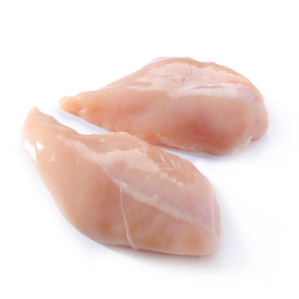

In [144]:
chicken_breast_image_test = Image.open('/content/drive/MyDrive/CNNRelatedFolders/Test Images/chicken_breast.jpg').resize(IMAGE_SHAPE)
chicken_breast_image_test

In [145]:
chicken_breast_image_test = np.array(chicken_breast_image_test)/255.0
chicken_breast_image_test.shape

(299, 299, 3)

In [147]:
predicted = model.predict(chicken_breast_image_test[np.newaxis, ...])
predicted = np.argmax(predicted, axis=1)
predicted

array([2])

# **Conclusion: Transfer Learning Success**

***For a more higher accuracy, consider adding more data into the dataset as well as increasing the number of epochs. For now, it successfully predicted a foreign image (image not in the dataset). This will also increase the training time especially if all of the common meat cuts where included. Consider doing this ASAP.***

For reference, here are the list of the labels initialized previously for the model:

```
meat_labels_dict = {
    'beef_short_ribs': 0,
    'beef_sirloin_unfinished': 1,
    'chicken_breast': 2,
    'chicken_feet': 3,
    'chicken_leg': 4,
    'pork_ribs': 5,
}
```

Therefore, since the image is chicken breast and the result is array[2], the prediction is correct.

To do: 
*   Export the model and try to run it using the Raspberry Pi. Buy meat cuts that are present in the dataset and try to compare the result.
*   Create a class that will automatically normalise images into the appropriate size and shape. 